In [2]:
import pickle
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
import pyLDAvis.gensim
import numpy as np
import numpy as np; np.random.seed(0)
import seaborn as sns
import os

# Global variables
version_number = "11"
senti = "_all"
results_dir = "results/"
grid_dir = 'grid/'
topic_models_dir = 'topic_models/'



C:\Users\mila1\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
topic_model = pickle.load(open('topic_models/topic_model_V' + version_number + senti, 'rb'))
corpus = pickle.load(open('corpusses/corpus_V' + version_number + senti, 'rb'))
id2word = pickle.load(open('dictionaries/dictionary_V' + version_number + senti, 'rb'))

print(topic_model)
# print(df['tokenized_tweets'])
    
# Load tokenized tweets for Coherence Score
df = pickle.load(open(results_dir + 'set_results_V' + version_number, 'rb'))

LdaModel(num_terms=46619, num_topics=10, decay=0.5, chunksize=2000)


In [1]:
# Compute Perplexity
# a measure of how good the model is. lower the better
# base_perplexity = topic_model.log_perplexity(corpus)

In [3]:
# print('\nPerplexity: ', base_perplexity)

No handles with labels found to put in legend.


time_window,7,14,21,28
num_topics,,,,
2,0.321221,0.308344,0.300607,0.294638
4,0.348308,0.332562,0.322954,0.317223
6,0.35777,0.342112,0.331804,0.32635
8,0.362913,0.347798,0.338095,0.331808
10,0.369447,0.354748,0.3439,0.33797
12,0.368752,0.353527,0.345773,0.339248
14,0.376781,0.361946,0.352843,0.345981
16,0.380421,0.365633,0.356356,0.350205


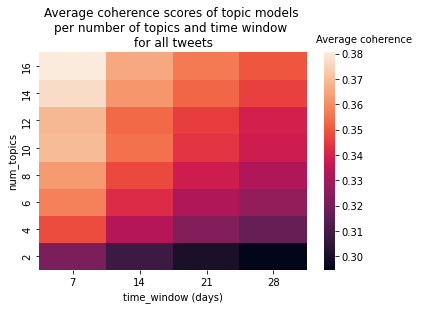

In [74]:
version_number = '25_all'

grid = pickle.load(open(grid_dir + 'grid_V' + version_number, 'rb'))


df_grid = pd.DataFrame(grid, columns =['time_window', 'num_topics', 'average_coherence'])
df_grid = df_grid[1:]

df_grid_25_all = df_grid.pivot("num_topics", "time_window", "average_coherence")
ax = sns.heatmap(df_grid_25_all.astype(float))
#     vmax=0.47,         # Ensure same 
#     vmin=0.3)          # color scale
ax.set_title('Average coherence scores of topic models \nper number of topics and time window \nfor all tweets')
ax.set_ylabel('num_topics')
ax.set_xlabel('time_window (days)')
ax.legend(title="Average coherence", bbox_to_anchor=(1.02, 1.1), loc='upper left', borderaxespad=0, frameon=False)
ax.invert_yaxis()
df_grid_25_all

No handles with labels found to put in legend.


time_window,7,14,21,28
num_topics,,,,
2,0.476089,0.462666,0.452842,0.442012
4,0.479163,0.467535,0.457867,0.449841
6,0.474379,0.469896,0.461906,0.456424
8,0.474774,0.467795,0.460706,0.454754
10,0.475184,0.466959,0.461618,0.456778
12,0.472397,0.464812,0.458336,0.45334
14,0.471833,0.461917,0.455321,0.450279
16,0.46842,0.456317,0.45095,0.447381


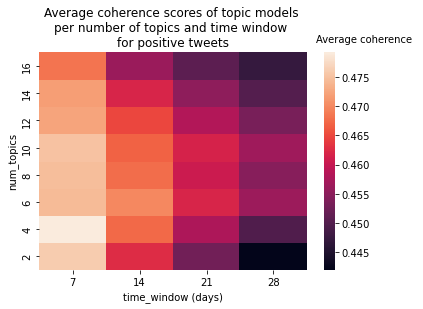

In [9]:
version_number = '27_pos'

grid = pickle.load(open(grid_dir + 'grid_V' + version_number, 'rb'))


df_grid = pd.DataFrame(grid, columns =['time_window', 'num_topics', 'average_coherence'])
df_grid = df_grid[1:]

df_grid_26_pos = df_grid.pivot("num_topics", "time_window", "average_coherence")
ax = sns.heatmap(df_grid_26_pos.astype(float))
#     vmax=0.47,         # Ensure same 
#     vmin=0.3)          # color scale
ax.set_title('Average coherence scores of topic models \nper number of topics and time window \nfor positive tweets')
ax.set_ylabel('num_topics')
ax.set_xlabel('time_window (days)')
ax.legend(title="Average coherence", bbox_to_anchor=(1.02, 1.1), loc='upper left', borderaxespad=0, frameon=False)
ax.invert_yaxis()
df_grid_26_pos

No handles with labels found to put in legend.


time_window,7,14,21,28
num_topics,,,,
2,0.336722,0.317946,0.304851,0.29534
4,0.35368,0.336283,0.324901,0.316536
6,0.369016,0.348671,0.337348,0.329758
8,0.376974,0.358197,0.347029,0.338751
10,0.381966,0.365141,0.352933,0.345409
12,0.387555,0.371037,0.359328,0.351553
14,0.389133,0.373261,0.361937,0.354225
16,0.389198,0.376006,0.365108,0.356989


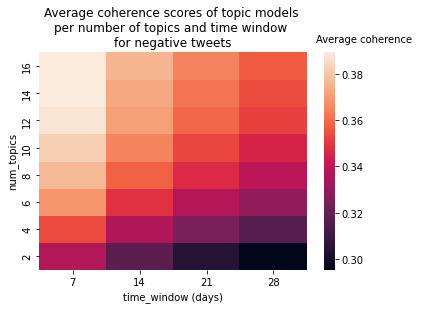

In [10]:
version_number = '27_neg'

grid = pickle.load(open(grid_dir + 'grid_V' + version_number, 'rb'))


df_grid = pd.DataFrame(grid, columns =['time_window', 'num_topics', 'average_coherence'])
df_grid = df_grid[1:]

df_grid_26_neg = df_grid.pivot("num_topics", "time_window", "average_coherence")
ax = sns.heatmap(df_grid_26_neg.astype(float))
#     vmax=0.47,         # Ensure same 
#     vmin=0.3)          # color scale
ax.set_title('Average coherence scores of topic models \nper number of topics and time window \nfor negative tweets')
ax.set_ylabel('num_topics')
ax.set_xlabel('time_window (days)')
ax.legend(title="Average coherence", bbox_to_anchor=(1.02, 1.1), loc='upper left', borderaxespad=0, frameon=False)
ax.invert_yaxis()
df_grid_26_neg

In [8]:
df_tweets_senti_19 = pickle.load(open(results_dir + 'set_results_V' + "16" + "_19", 'rb'))

In [9]:
print(df_tweets_senti_19.shape[0])

168060


In [10]:
start_date = "2019-06-01 00:00:01"

after_start_date = df_tweets_senti_19["date"] >= start_date
df_tweets_senti_19 = df_tweets_senti_19.loc[after_start_date]


In [28]:
print(df_tweets_senti_19.shape[0])

166424
